# Forecasting

In this assignment, we will explore the python package [statsmodels](http://www.statsmodels.org/dev/tsa.html) to forecast the time series data. You will learn to use different time series modeling technique for forecasting.

Learning Objectives:

- Decompose time series into autocorrelation, seasonality, trend, and noise.
- Explain the effects of exponential smoothing models and differentiate them from other models.
- Apply and evaluate the results of an autoregressive model.
- Apply and evaluate the results of a moving average model.
- Apply and evaluate the results of an autoregressive integrated moving average model.
- Apply and evaluate the results of ARIMA model for forecasting (time series prediction).


In [139]:
# # install packages
# import sys
# !pip3 install --prefix {sys.prefix} statsmodels

In [140]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

----------

## Air Passenger Dataset
This dataset provides monthly totals of international airline passengers from 1949 to 1960. You can find a copy of the dataset on [Kaggle](https://www.kaggle.com/rakannimer/air-passengers) or [R datasets](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/AirPassengers.html).

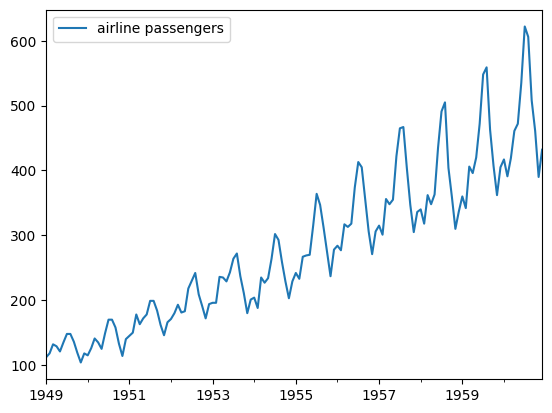

In [141]:
df = pd.read_csv('./airline-passengers.csv', index_col=[0], parse_dates=True)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

# split the data into train and test
train, test = df.iloc[:130, [0]], df.iloc[130:, [0]]

df.plot()
pyplot.show()

Question 1.1: Using [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) API from `statsmodels.tsa.seasonal`, apply additive decomposition to the airline passenger dataset and plot each components from the decomposition.

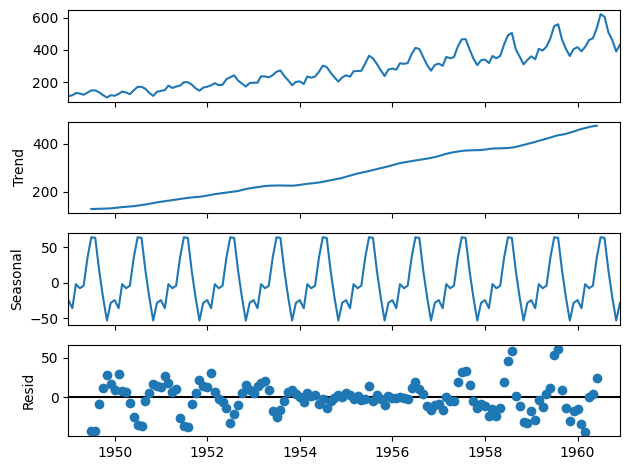

In [142]:
# additive decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df, model='additive')
result.plot()
pyplot.show()

Question 1.2: Using [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) API from `statsmodels.tsa.seasonal`, apply multiplication decomposition to the same airline passenger dataset and plot each components from the decomposition. Which decomposition makes more sense in this dataset?

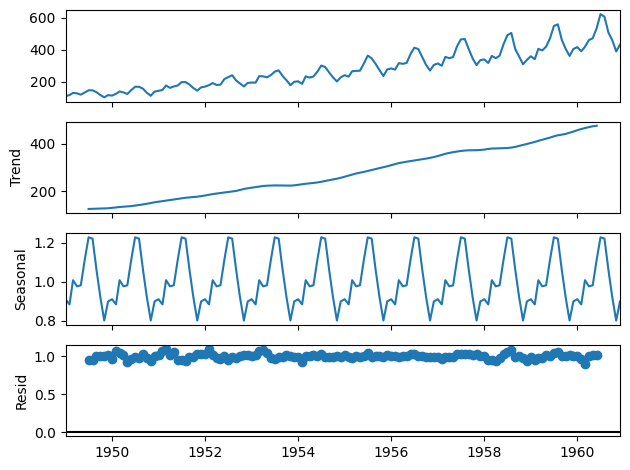

In [143]:
# multiplicative decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df, model='multiplicative')
result.plot()
pyplot.show()

# Analysis for Q1.2

We can very clearly (in all 3 plots) see the variance in seasonality for this time series data. We also observe a much more constant residual in the multiplicative scenario, so I would say the multiplicative decomposition makes more sense.

----------

Question 2.1: Apply the simple exponential smoothing technique ([SimpleExpSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameter `smoothing_level` and see how it impacts the model accuracy.

In [144]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# fit model
ses = SimpleExpSmoothing(df)
alpha = 0.5

models_ses = {
    "ses_alpha_0.01" : ses.fit(smoothing_level=0.01, optimized=False),
    "ses_alpha_0.1" : ses.fit(smoothing_level=0.1, optimized=False),
    "ses_alpha_0.2" : ses.fit(smoothing_level=0.2, optimized=False),
    "ses_alpha_0.8" : ses.fit(smoothing_level=0.8, optimized=False),
    "ses_alpha_5" : ses.fit(smoothing_level=5, optimized=False),
}

for key, model in models_ses.items():
    y_pred = model.predict(start=len(train), end=len(train)+len(test)-1)
    y_fore = model.forecast(14)
    print("Model Name:" + str(key))
    print(" rmse of predict:" + str(sqrt(mean_squared_error(test, y_pred))))
    print(" mae of predict:" + str(mean_absolute_error(test, y_pred)))
    print(" rmse of forecast:" + str(sqrt(mean_squared_error(test, y_fore))))
    print(" mae of forecast:" + str(mean_absolute_error(test, y_fore)))

# none of these results seem great

Model Name:ses_alpha_0.01
 rmse of predict:216.68368661264142
 mae of predict:203.63360275534046
 rmse of forecast:202.53355930218262
 mae of forecast:187.494546290042
Model Name:ses_alpha_0.1
 rmse of predict:79.93310481022938
 mae of predict:58.549960026262056
 rmse of forecast:76.6324511888434
 mae of forecast:60.642857142857146
Model Name:ses_alpha_0.2
 rmse of predict:76.44453344037133
 mae of predict:60.0833640910531
 rmse of forecast:76.8800893411194
 mae of forecast:63.108597800133566
Model Name:ses_alpha_0.8
 rmse of predict:56.51401962804073
 mae of predict:47.61467674663105
 rmse of forecast:84.60821004100693
 mae of forecast:61.36121521047114
Model Name:ses_alpha_5
 rmse of predict:2.1277826278558968e+85
 mae of predict:7.341547518902223e+84
 rmse of forecast:3.08344996942568e+86
 mae of forecast:3.08344996942568e+86


----------

Question 2.2: Apply the HWES technique ([ExponentialSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy.

In [145]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit model
es = ExponentialSmoothing(df)

# alpha = smoothing_level
# beta = smoothing_trend
# gamma = smoothing_seasonal
# phi = damping_trend

models_ses = {
    "es_alpha_incr" : es.fit(smoothing_level=0.1, smoothing_trend=0.2, smoothing_seasonal=0.4, damping_trend=0.8, optimized=False),
    "es_alpha_decr" : es.fit(smoothing_level=0.8, smoothing_trend=0.4, smoothing_seasonal=0.2, damping_trend=0.1, optimized=False),
    "es_alpha_flat" : es.fit(smoothing_level=0.3, smoothing_trend=0.3, smoothing_seasonal=0.3, damping_trend=0.3, optimized=False),
    "es_alpha_szn" : es.fit(smoothing_level=0.2, smoothing_trend=0.2, smoothing_seasonal=5, damping_trend=0.1, optimized=False),
    "es_alpha_allup" : es.fit(smoothing_level=5, smoothing_trend=3, smoothing_seasonal=5, damping_trend=1, optimized=False),
}

for key, model in models_ses.items():
    y_pred = model.predict(start=len(train), end=len(train)+len(test)-1) #model.predict(#model.predict(0,13)
    y_fore = model.forecast(14)
    print("Model Name:" + str(key))
    print(" rmse of predict: " + str(sqrt(mean_squared_error(test, y_pred))))
    print(" mae of predict: " + str(mean_absolute_error(test, y_pred)))
    print(" rmse of forecast: " + str(sqrt(mean_squared_error(test, y_fore))))
    print(" mae of forecast: " + str(mean_absolute_error(test, y_fore)))

Model Name:es_alpha_incr
 rmse of predict: 79.93310387313488
 mae of predict: 58.54995963439108
 rmse of forecast: 76.6324511317678
 mae of forecast: 60.642857142857146
Model Name:es_alpha_decr
 rmse of predict: 56.51401962804073
 mae of predict: 47.61467674663105
 rmse of forecast: 84.60821004100693
 mae of forecast: 61.36121521047114
Model Name:es_alpha_flat
 rmse of predict: 74.56554173247376
 mae of predict: 61.332808920990715
 rmse of forecast: 76.59626596067832
 mae of forecast: 60.861882466605365
Model Name:es_alpha_szn
 rmse of predict: 76.4445334403714
 mae of predict: 60.083364091053305
 rmse of forecast: 76.8800893411194
 mae of forecast: 63.108597800133566
Model Name:es_alpha_allup
 rmse of predict: 2.432045384037952e+86
 mae of predict: 8.391353760150471e+85
 rmse of forecast: 3.5243685923924943e+87
 mae of forecast: 3.524368592392495e+87


-----

Question 3.1: Apply Autoregression model ([AR](http://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy.

In [146]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
from random import random

# fit model
# {‘n’, ‘c’, ‘t’, ‘ct’} for trend
ar_models = {
    "ar_trendn_szn" : AutoReg(train, trend='n', lags=[1,3,5], seasonal=True).fit(),
    "ar_trendc_szn" : AutoReg(train, trend='c', lags=[1,3,5], seasonal=True).fit(),
    "ar_trendt_szn" : AutoReg(train, trend='t', lags=[1,3,5], seasonal=True).fit(),
    "ar_trendct_szn" : AutoReg(train, trend='ct', lags=[1,3,5], seasonal=True).fit(),
}

# make prediction
for key, model in ar_models.items():
    y_pred = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    print("Model Name:" + str(key))
    print(" rmse of predict: " + str(sqrt(mean_squared_error(test, y_pred))))
    print(" mae of predict: " + str(mean_absolute_error(test, y_pred)))

Model Name:ar_trendn_szn
 rmse of predict: 43.22504501818392
 mae of predict: 31.49248475793113
Model Name:ar_trendc_szn
 rmse of predict: 43.225045018173056
 mae of predict: 31.49248475792356
Model Name:ar_trendt_szn
 rmse of predict: 43.70730926457381
 mae of predict: 32.73993956931004
Model Name:ar_trendct_szn
 rmse of predict: 43.70730926456643
 mae of predict: 32.739939569304155


----------

Question 3.2: Apply Moving Average model ([ARMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy.

In [147]:
# MA example
from statsmodels.tsa.arima_process import ArmaProcess

# In MA example we have 0, 0, 1 (p, d, q)

ar1 = np.array([1],)
ma1 = np.array([1, -0.1])
ar2 = np.array([1])
ma2 = np.array([1, -0.5])
ar3 = np.array([1])
ma3 = np.array([1, -0.9])

# fit model
ma_models = {
  "ma_01" : ArmaProcess(ar1, ma1),
  "ma_05" : ArmaProcess(ar2, ma2),
  "ma_09" : ArmaProcess(ar3, ma3),
}

num_sample = len(test)
# make prediction
#print RMSE and MAE
for key, model in ma_models.items():
    y_pred = model.generate_sample(nsample=num_sample)
    print(" rmse of predict: " + str(sqrt(mean_squared_error(test, y_pred))))
    print(" mae of predict: " + str(mean_absolute_error(test, y_pred)))
    print(" Is stationary?: " + str(model.isstationary))

 rmse of predict: 469.1129929185706
 mae of predict: 462.8403112776358
 Is stationary?: True
 rmse of predict: 469.51811713100096
 mae of predict: 463.250877406353
 Is stationary?: True
 rmse of predict: 469.2042718134023
 mae of predict: 462.90310131062427
 Is stationary?: True


----------

Questio 4.1: Apply Moving Average model ([ARMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy.

In [138]:
# ARMA example
#from statsmodels.tsa.arima_model import ARMA # this has been deprecated
from statsmodels.tsa.arima.model import ARIMA

# fit model
arma_models = {
  "ar1ma1" : ARIMA(df, order=(1,0,1)).fit(),
  "ar2ma1" : ARIMA(df, order=(2,0,1), trend='ct').fit(),
  "ar1ma2" : ARIMA(df, order=(1,0,2), trend='t').fit(),
  "ar2ma2" : ARIMA(df, order=(2,0,2)).fit(),
  "ar1ma1" : ARIMA(df, order=(1,1,1)).fit(),
}

# make prediction
#print RMSE and MAE
for key, model in arma_models.items():
    print(model.summary())
    y_pred = model.predict(start=len(train), end=len(train)+len(test)-1)
    print(" rmse of predict: " + str(sqrt(mean_squared_error(test, y_pred))))
    print(" mae of predict: " + str(mean_absolute_error(test, y_pred)))



                               SARIMAX Results                                
Dep. Variable:     airline passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Tue, 18 Jun 2024   AIC                           1394.683
Time:                        04:44:20   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

----------

Question 4.2: Apply Moving Average model ([ARIMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy.

                               SARIMAX Results                                
Dep. Variable:     airline passengers   No. Observations:                  144
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -698.172
Date:                Tue, 18 Jun 2024   AIC                           1408.344
Time:                        05:05:25   BIC                           1426.162
Sample:                    01-01-1949   HQIC                          1415.584
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.3016     60.094      4.664      0.000     162.519     398.084
ar.L1          0.2540      0.223      1.137      0.256      -0.184       0.692
ar.L2          0.6510      0.192      3.397      0.0

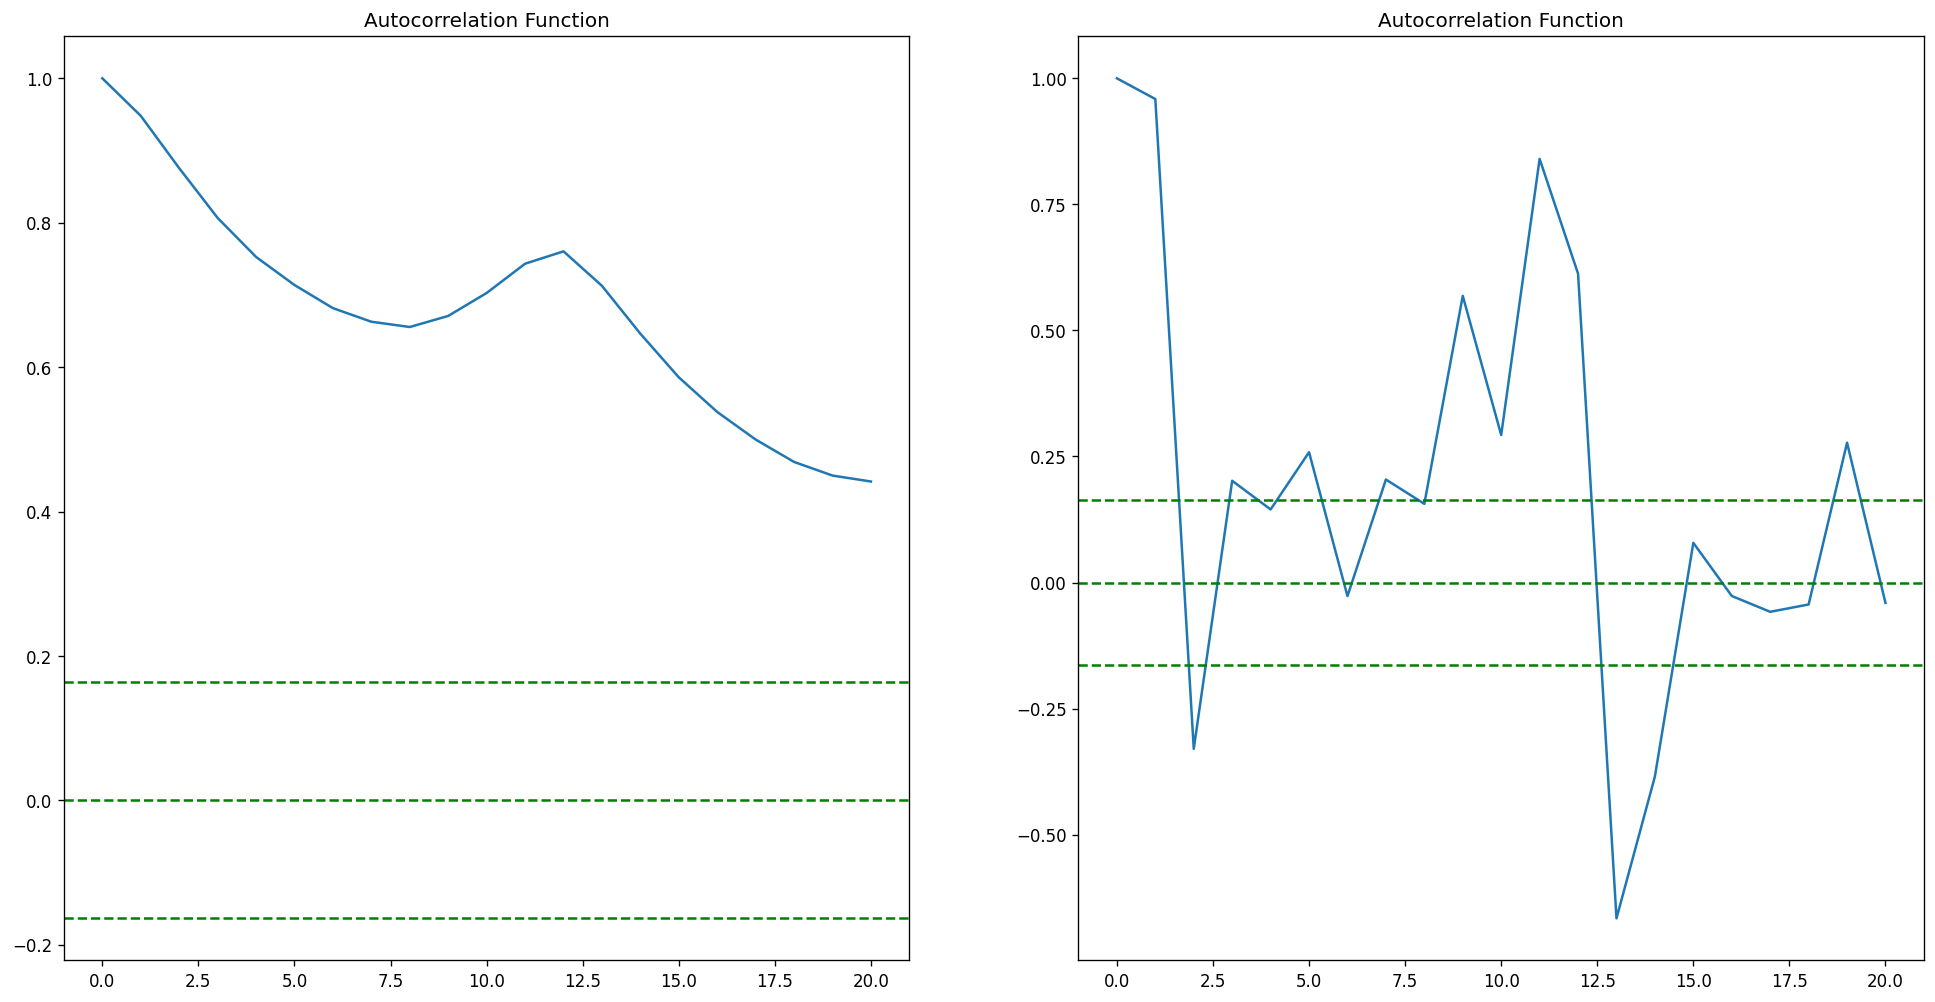

In [160]:
# ARIMA example

# Can we try to actually get the PACF/AR (p) and MA (q) values? I'm not good at reading these charts.
# Taken from gsearch, mildly interesting to look at some plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # unused
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(df, nlags=20)
lag_pacf=pacf(df, nlags=20, method='ols')

pyplot.figure(figsize=(20,10))
pyplot.subplot(121)
pyplot.plot(lag_acf)
pyplot.axhline(y=0,linestyle='--',color='green')
pyplot.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='green')
pyplot.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='green')
pyplot.title('Autocorrelation Function')

pyplot.subplot(122)
pyplot.plot(lag_pacf)
pyplot.axhline(y=0,linestyle='--',color='green')
pyplot.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='green')
pyplot.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='green')
pyplot.title('Autocorrelation Function')

# fit model
arima_models = {
  "ar2ma2" : ARIMA(df, order=(2,0,2)).fit(method='statespace'),
  "ar2ma1" : ARIMA(df, order=(2,0,1)).fit(method='innovations_mle'),
  "ar1ma2" : ARIMA(df, order=(1,0,2)).fit(method='hannan_rissanen'),
}

# make prediction
#print RMSE and MAE
for key, model in arima_models.items():
    print(model.summary())
    y_pred = model.predict(start=len(train), end=len(train)+len(test)-1)
    print(" rmse of predict: " + str(sqrt(mean_squared_error(test, y_pred))))
    print(" mae of predict: " + str(mean_absolute_error(test, y_pred)))

Question 5: After running through various time series models, summarize your findings.

# Q5

I played with several models in my analysis and tweaked a bunch of values to just see what would happen. Most changes were pretty minute. Some huge values for alpha in the Simple Smoothing would lead to some outrageously huge RMSEs. I think if I were to do some work with this dataset I would lean heavier into the AR and ARIMA modeling. The summary statistics alone give a good picture of the model output. The RMSE and MAE seems more realistic in these scenarios.

On top of this I think some more visualization is heavily needed for this dataset!

Question 6. Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include: What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.

# Q6

1. No experience, but I've looked at a lot of time series graphs from analytics databases to time-series in securities trading, etc.
2. Encountered some obstacles with older, deprecated libraries. Also encountered obstacles interpreting the data from the results. I think more visualization (and more understanding on my end) would go pretty far. I also think since this data is *so* obviously seasonal and very easy to see a trend with, it's a good learning dataset.
3. I would resolve these by doing some searching, trying to visualize other elements of the data (PACF for example) that weren't necessarily included in the lab. I tried some default values and trial and error too, since nothing was overly compute intensive with this dataset.
4. There's a TON of real world application to time-series modeling and prediction/forecasting. Think stock market, weather (although this one has largely been optimized in a really humorous way - "if it is sunny today, it will be sunny tomorrow" still provides the best prediction in most cases wihtout further data), predicting traffic patterns, etc.
5. There weren't too many missing steps on this lab, I felt like adding or looking for accurate p/q values would be pretty important.